In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
temp=pd.read_csv('Polynomial_train.csv')
temp2=pd.read_csv('Polynomial_test.csv')

In [ ]:
x_train=temp
y_train=temp['label']
del x_train['Unnamed: 0']
del x_train['label']
x=temp['X']
y=temp['Y']
z=temp['Z']
xarray=x.to_numpy()
yarray=y.to_numpy()
zarray=z.to_numpy()
xsquare=np.multiply(xarray,xarray)
ysquare=np.multiply(yarray,yarray)
zsquare=np.multiply(zarray,zarray)
xy=np.multiply(xarray,yarray)
yz=np.multiply(yarray,zarray)
zx=np.multiply(zarray,xarray)

x_train.insert(1,'X2',xsquare)
x_train.insert(3,'Y2',ysquare)
x_train.insert(5,'Z2',zsquare)
x_train.insert(2,'XY',xy)
x_train.insert(5,'YZ',yz)
x_train.insert(8,'ZX',zx)


In [ ]:
x_test=temp2
y_test=temp2['label']
del x_test['Unnamed: 0']
del x_test['label']
x1=temp2['X']
y1=temp2['Y']
z1=temp2['Z']
x1array=x1.to_numpy()
y1array=y1.to_numpy()
z1array=z1.to_numpy()
x1square=np.multiply(x1array,x1array)
y1square=np.multiply(y1array,y1array)
z1square=np.multiply(z1array,z1array)
x1y1=np.multiply(x1array,y1array)
y1z1=np.multiply(y1array,z1array)
z1x1=np.multiply(z1array,x1array)

x_test.insert(1,'X2',x1square)
x_test.insert(3,'Y2',y1square)
x_test.insert(5,'Z2',z1square)
x_test.insert(2,'XY',x1y1)
x_test.insert(5,'YZ',y1z1)
x_test.insert(8,'ZX',z1x1)

In [ ]:
def normalize(arr,cou):
  #max=np.max(arr)
  #min=np.min(arr)
  sum_elements=np.sum(arr)
  mean=sum_elements/cou
  d=arr-mean
  std=np.sum(np.multiply(d,d))
  stdev=(std/cou)**0.5
  arr=(arr-mean)*(1/stdev)
  return arr

In [ ]:
X_train=x_train.to_numpy()
Y_train=y_train.to_numpy()
r,c=X_train.shape
X_train=np.concatenate((np.ones((r,1)),X_train),axis=1)

X_test=x_test.to_numpy()
R,C=X_test.shape
X_test=np.concatenate((np.ones((R,1)),X_test),axis=1)
Y_test=y_test.to_numpy()

X_train=X_train.T
for i in range(c+1):
 if(i==0):
  continue 
 X_train[i]=normalize(X_train[i],r)
X_train=X_train.T

X_test=X_test.T
for i in range(C+1):
 if(i==0):
  continue 
 X_test[i]=normalize(X_test[i],R)
X_test=X_test.T

In [ ]:
def plot(X, Y,):
  plt.grid(True)
  plt.scatter(X,Y, marker = "x")
  plt.xlabel('X →')
  plt.ylabel('Y →')
  plt.show()

In [ ]:
def cost(X,Y,theta):
  diff=X@theta-Y
  J=(diff.T)@diff
  return J

In [ ]:
def train_(X,Y,no_iterations,learn):
  np.random.seed(40)
  #calculate rows, colums and generating parameters
  row, column = X.shape 
  derivative=np.ones((column,1))
  J= np.ones(no_iterations)
  parameter=np.random.randn(column,1)
  m=row
  Y=Y.reshape(row,1)

  for i in range(no_iterations):
   #Initializing hypothesis and calulating cost function
   Y_hypo= np.dot(X,parameter)
   J[i]=(cost(X,Y,parameter))/(2*m)

   #updating parameter by gradient descent
   derivative=((X.T)@(Y_hypo-Y))/m
   parameter=parameter- learn*derivative
  plot(np.arange(no_iterations),J)
  return parameter

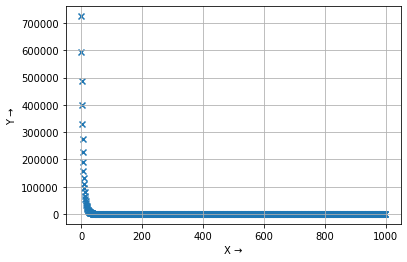

the error in test label prediction is:  26.16166678987422


In [ ]:
p=train_(X_train, Y_train,1000,1.9)
#error=cost(X_train,Y_train.reshape(r,1),p)/(2*r)
y_hypo=X_test @ p
error=cost(X_test,Y_test.reshape(R,1),p)/(2*R)
print("the error in test label prediction is: ", error[0,0])